In [51]:
# generate sum pairs
from random import seed
from random import randint
seed(1234)
from numpy import array, argmax
from pprint import pprint
from keras.models import Sequential
from keras.layers import LSTM, Dense, Conv2D, MaxPooling2D, Flatten, TimeDistributed
from keras.metrics import Accuracy
# from keras.
from math import sin, pi
from matplotlib import pyplot as plt



In [38]:
cnn = Sequential()
cnn.add(Conv2D(1, (2, 2), activation='relu', padding='same', input_shape=(10, 10, 1)))
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Flatten())

In [39]:
from numpy import zeros
from random import randint, random


In [40]:
# instance generator
def next_frame(last_step, last_frame, column):
    lower = max(0, last_step-1)
    upper = min(last_frame.shape[0]-1, last_step+1)
    # choose row index for the next step
    step = randint(lower, upper)  # only three return, upper, keep this or lower
    frame = last_frame.copy()
    frame[step, column] = 1
    return frame, step

In [41]:
# generate a sequence of frames of a dot across an image
def build_frames(size):  # size is how many frame we wanna
    frames = list()
    # what?? frame is a list ....
    # create the first frame
    frame = zeros((size, size))
    step = randint(0, size-1)  # if we wanna it from bottom, we need to change the step... 以后自己的东西，就要这么改。。。
    # decide if we are heading left or right
    right = 1 if random() < 0.5 else 0
    col = 0 if right else size-1
    frame[step, col] = 1
    frames.append(frame)
    # remaining frame
    for i in range(1, size):
        col = i if right else size-1-i  # inverse , or heading from right to left
        frame, step = next_frame(step, frame, col)
        frames.append(frame)
    return frames, right # right is 1 if from right, else right is 0
    
    
    

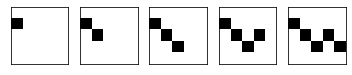

In [55]:
# generate sequence of frames
size = 5
frames, right = build_frames(size)
# you only need to call build frames to create all instance
# plot all frames in grayscake subplots , its very clear
plt.figure()
for i in range(size):
    plt.subplot(1, size, i+1)  # i + 1 is the plot_number. index 1, and 2 is the row and column
    plt.imshow(frames[i], cmap='Greys')
    # turn off the scale to make it more clear
    ax = plt.gca()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()
    
    


In [56]:
size = 50

In [57]:
# define a function to generate model

In [64]:
def generate_examples(size, n_patterns):
    X, y = list(), list()
    for _ in range(n_patterns):
        frames, right = build_frames(size)
        X.append(frames)
        y.append(right)
        
    X = array(X).reshape(n_patterns, size, size, size, 1)
    y = array(y).reshape(n_patterns, 1)
    return X, y  # right is the label, groud truth label....
        

In [65]:
# create model
model = Sequential()
model.add(TimeDistributed(Conv2D(2, (2, 2), activation='relu'), input_shape=(None, size,size, 1)))
model.add(TimeDistributed(MaxPooling2D(pool_size=(2, 2))))
model.add(TimeDistributed(Flatten()))
model.add(LSTM(50))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()



Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
time_distributed_11 (TimeDis (None, None, 49, 49, 2)   10        
_________________________________________________________________
time_distributed_12 (TimeDis (None, None, 24, 24, 2)   0         
_________________________________________________________________
time_distributed_13 (TimeDis (None, None, 1152)        0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 50)                240600    
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 51        
Total params: 240,661
Trainable params: 240,661
Non-trainable params: 0
_________________________________________________________________


In [66]:
# fit the model
X, y = generate_examples(size, 5000)
model.fit(X, y, batch_size=32, epochs=1)

157/157 [==============================] - 17s 100ms/step - loss: 0.3432 - accuracy: 0.8092


In [68]:
# evaluate model
X, y = generate_examples(size, 100)  # 100 个数据条数
loss, acc = model.evaluate(X, y, verbose=0)
print(f'loss is {loss}, acc is {acc*100} %')

loss is 0.003376721404492855, acc is 100.0 %


In [69]:
# predict on new data
X, y = generate_examples(size, 1)
yhat = model.predict_classes(X, verbose=0)
expected = 'Right' if y[0]==1 else 'Left'
predicted = 'Right' if yhat[0]==1 else 'LEFT'
print(f'expeted {expected}, predicted: {predicted}')

/Users/xingnan/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


expeted Left, predicted: LEFT


In [74]:
y[0]

array([0])